In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("PRUEBA EXCEL NIVEL INTERMEDIO.xlsx", sheet_name = "Data")

In [3]:
data.head()

,GUIA,SHIPPER,ORIGEN,DPTO ORIGEN,PROV ORIGEN,DISTRITO ORIGEN,FECHA,ARRIBO DESTINO,DESTINO,ESTADO ACTUAL,NRO VISITAS,PRIMERA VISITA,RESULTADO VISITA 1,DISTRITO,PROVINCIA,DEPARTAMENTO,TIPO ZONA,PIEZAS,ANS ENTREGA,DIAS DEMORA
0,1,urbano,HYO,JUNIN,HUANCAYO,HUANCAYO,2024-02-01,2024-02-05,CNT,ENTREGADO,1,2024-02-05,ENTREGADO,SAN VICENTE DE CAÑETE,CAÑETE,LIMA,Urbana,1.0,ON TIME,-2.0
1,2,urbano,HYO,JUNIN,HUANCAYO,HUANCAYO,2024-02-06,2024-02-10,TRU,ENTREGADO,1,2024-02-10,ENTREGADO,LA ESPERANZA,TRUJILLO,LA LIBERTAD,Urbana,1.0,ON TIME,-2.0
2,3,urbano,PIU,PIURA,PIURA,PIURA,2024-02-07,2024-02-15,PIS,ENTREGADO,1,2024-02-16,ENTREGADO,PARACAS,PISCO,ICA,Periferico,1.0,OFF TIME,3.0
3,4,urbano,CHM,ANCASH,SANTA,CHIMBOTE,2024-02-10,2024-02-13,TRU,ENTREGADO,1,2024-02-15,ENTREGADO,LA ESPERANZA,TRUJILLO,LA LIBERTAD,Urbana,1.0,OFF TIME,1.0
4,5,urbano,HYO,JUNIN,HUANCAYO,HUANCAYO,2024-02-11,NaT,PCL,GE CANCELADA,0,NaT,NaN,CALLERIA,CORONEL PORTILLO,UCAYALI,Urbana,NaN,EN PROCESO ON TIME,NaN


In [4]:
#sort_values(ascending = True).reset_index()
estado = data['ESTADO ACTUAL'].value_counts().to_frame().sort_values(by= "count", ascending = True).reset_index()
estado

,ESTADO ACTUAL,count
0,ENVIO SINIESTRADO,1
1,DESPACHADO A DESTINO,4
2,VISITADO SIN ENTREGA,10
3,ARRIBADO EN DESTINO,16
4,SOLICITUD DE SERVICIO,22
5,SALIO A RUTA,32
6,GE CANCELADA,82
7,ENTREGADO,332


<BarContainer object of 8 artists>

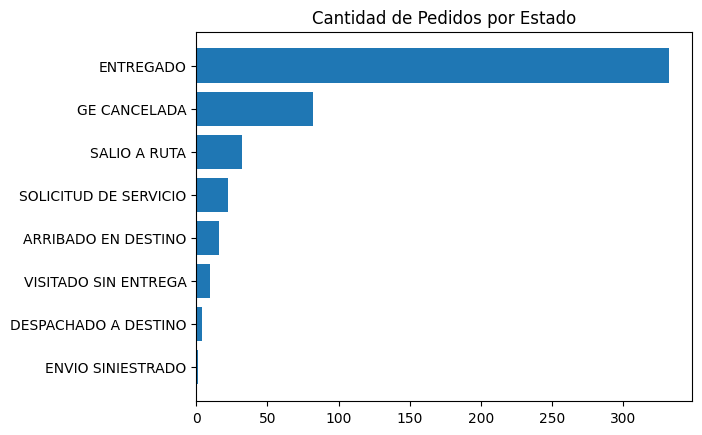

In [5]:
fig, ax = plt.subplots()
labels = estado["ESTADO ACTUAL"]
datos = estado["count"]

ax.set_title("Cantidad de Pedidos por Estado")
ax.barh(labels, datos)

In [6]:
ans_entrega = data['ANS ENTREGA'].value_counts().to_frame().sort_values(by= "count", ascending = True).reset_index()
ans_entrega

,ANS ENTREGA,count
0,EN PROCESO OFF TIME,4
1,OFF TIME,46
2,EN PROCESO ON TIME,150
3,ON TIME,299


<BarContainer object of 4 artists>

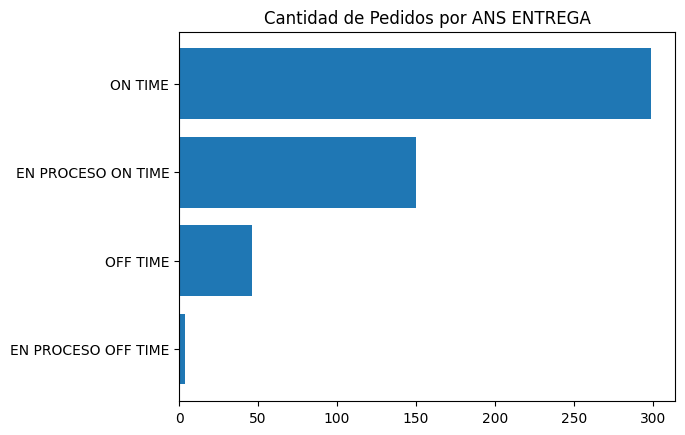

In [7]:
fig, ax = plt.subplots()
labels = ans_entrega["ANS ENTREGA"]
datos = ans_entrega["count"]

ax.set_title("Cantidad de Pedidos por ANS ENTREGA")
ax.barh(labels, datos)

In [8]:
estado_actual = data.groupby("ESTADO ACTUAL")
estado_actual

In [9]:
entregado = estado_actual.get_group("ENTREGADO")
entregado.head()

,GUIA,SHIPPER,ORIGEN,DPTO ORIGEN,PROV ORIGEN,DISTRITO ORIGEN,FECHA,ARRIBO DESTINO,DESTINO,ESTADO ACTUAL,NRO VISITAS,PRIMERA VISITA,RESULTADO VISITA 1,DISTRITO,PROVINCIA,DEPARTAMENTO,TIPO ZONA,PIEZAS,ANS ENTREGA,DIAS DEMORA
0,1,urbano,HYO,JUNIN,HUANCAYO,HUANCAYO,2024-02-01,2024-02-05,CNT,ENTREGADO,1,2024-02-05,ENTREGADO,SAN VICENTE DE CAÑETE,CAÑETE,LIMA,Urbana,1.0,ON TIME,-2.0
1,2,urbano,HYO,JUNIN,HUANCAYO,HUANCAYO,2024-02-06,2024-02-10,TRU,ENTREGADO,1,2024-02-10,ENTREGADO,LA ESPERANZA,TRUJILLO,LA LIBERTAD,Urbana,1.0,ON TIME,-2.0
2,3,urbano,PIU,PIURA,PIURA,PIURA,2024-02-07,2024-02-15,PIS,ENTREGADO,1,2024-02-16,ENTREGADO,PARACAS,PISCO,ICA,Periferico,1.0,OFF TIME,3.0
3,4,urbano,CHM,ANCASH,SANTA,CHIMBOTE,2024-02-10,2024-02-13,TRU,ENTREGADO,1,2024-02-15,ENTREGADO,LA ESPERANZA,TRUJILLO,LA LIBERTAD,Urbana,1.0,OFF TIME,1.0
5,6,urbano,HYO,JUNIN,HUANCAYO,HUANCAYO,2024-02-11,2024-02-16,PCL,ENTREGADO,2,2024-02-20,ENTREGADO,CALLERIA,CORONEL PORTILLO,UCAYALI,Urbana,1.0,OFF TIME,2.0


In [10]:
#.to_frame().sort_values(by= "count", ascending = False).reset_index()
entregados_por_ans_entrega = entregado['ANS ENTREGA'].value_counts()
entregados_por_ans_entrega

ANS ENTREGA
ON TIME     286
OFF TIME     46
Name: count, dtype: int64

<Axes: title={'center': 'Cantidad de Pedidos entregados según ANS ENTREGA'}, xlabel='ANS ENTREGA'>

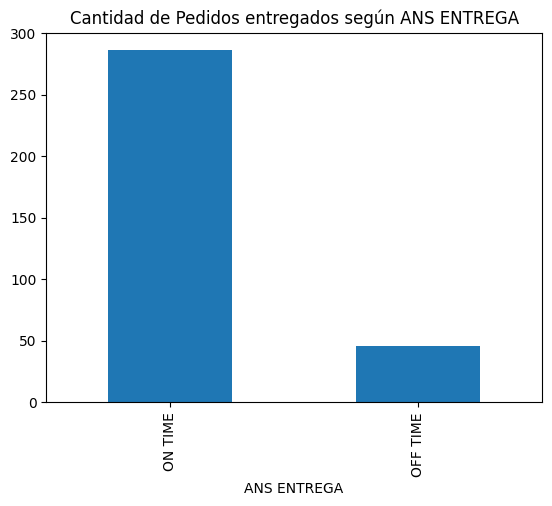

In [11]:
entregados_por_ans_entrega.plot(kind = 'bar', title='Cantidad de Pedidos entregados según ANS ENTREGA')

In [12]:
on_time = entregado["ANS ENTREGA"] == "ON TIME"
off_time = entregado["ANS ENTREGA"] == "OFF TIME"

In [13]:
entregado_on_time = entregado[on_time]
entregado_off_time = entregado[off_time]

In [14]:
provincias_on_time = entregado_on_time["PROVINCIA"].value_counts()
provincias_on_time

PROVINCIA
LA CONVENCION            91
SAN MARTIN               17
CUTERVO                  12
CANCHIS                  12
CHACHAPOYAS               9
CARAVELI                  9
CUSCO                     8
CAJABAMBA                 8
ABANCAY                   8
CHOTA                     7
URUBAMBA                  7
JAEN                      7
ILO                       7
MOYOBAMBA                 5
UTCUBAMBA                 5
ESPINAR                   5
MAYNAS                    5
ANDAHUAYLAS               5
HUALGAYOC                 4
RIOJA                     3
MARISCAL NIETO            3
SANCHEZ CARRION           3
SAN IGNACIO               3
PUNO                      2
CORONEL PORTILLO          2
TRUJILLO                  2
HUANTA                    2
CAMANA                    2
CAÑETE                    2
CONTUMAZA                 2
SULLANA                   2
MARISCAL CACERES          2
CHUPACA                   1
TACNA                     1
SAN PABLO                 1
TOCACHE   

In [17]:
top_10_provincias_on_time = entregado_on_time["PROVINCIA"].value_counts().to_frame().head(10).sort_values(by= "count", ascending = True).reset_index()
top_10_provincias_on_time

,PROVINCIA,count
0,CHOTA,7
1,CUSCO,8
2,CAJABAMBA,8
3,ABANCAY,8
4,CHACHAPOYAS,9
5,CARAVELI,9
6,CUTERVO,12
7,CANCHIS,12
8,SAN MARTIN,17
9,LA CONVENCION,91


<BarContainer object of 10 artists>

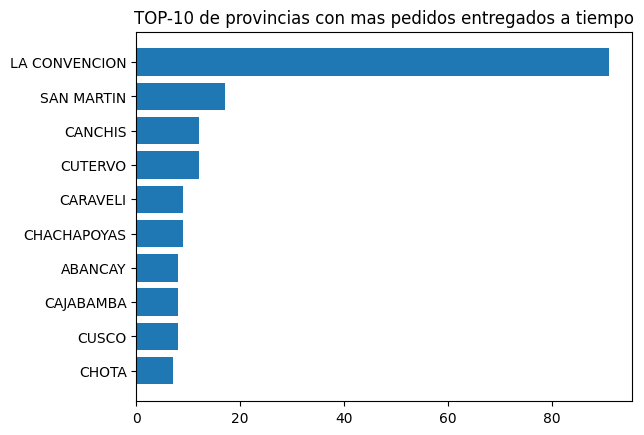

In [18]:
fig, ax = plt.subplots()
labels = top_10_provincias_on_time["PROVINCIA"]
datos = top_10_provincias_on_time["count"]

ax.set_title("TOP-10 de provincias con mas pedidos entregados a tiempo")
ax.barh(labels, datos)

In [16]:
provincias_off_time = entregado_off_time["PROVINCIA"].value_counts()
provincias_off_time

PROVINCIA
CUSCO               6
CANCHIS             5
TRUJILLO            4
CHACHAPOYAS         3
ISLAY               3
MARISCAL NIETO      3
ILO                 2
TACNA               2
PUNO                2
PISCO               2
CORONEL PORTILLO    2
MAYNAS              1
ESPINAR             1
LA CONVENCION       1
VIRU                1
ALTO AMAZONAS       1
CAYLLOMA            1
RIOJA               1
TAMBOPATA           1
SATIPO              1
JAEN                1
SANTA               1
CALCA               1
Name: count, dtype: int64

In [19]:
top_10_provincias_off_time = entregado_off_time["PROVINCIA"].value_counts().to_frame().head(10).sort_values(by= "count", ascending = True).reset_index()
top_10_provincias_off_time

,PROVINCIA,count
0,ILO,2
1,TACNA,2
2,PUNO,2
3,PISCO,2
4,CHACHAPOYAS,3
5,ISLAY,3
6,MARISCAL NIETO,3
7,TRUJILLO,4
8,CANCHIS,5
9,CUSCO,6


<BarContainer object of 10 artists>

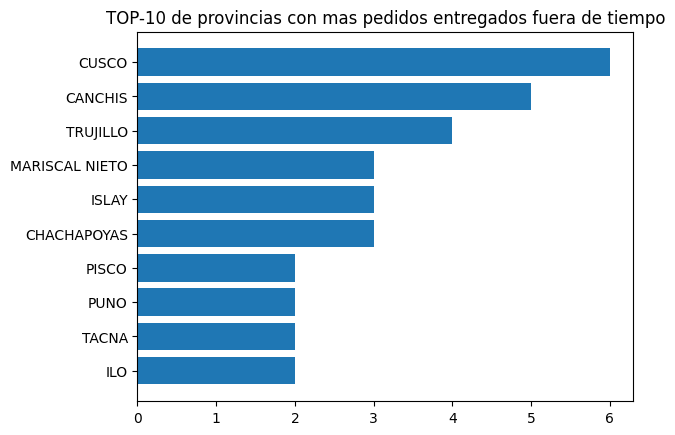

In [20]:
fig, ax = plt.subplots()
labels = top_10_provincias_off_time["PROVINCIA"]
datos = top_10_provincias_off_time["count"]

ax.set_title("TOP-10 de provincias con mas pedidos entregados fuera de tiempo")
ax.barh(labels, datos)

In [24]:
zona_on_time = entregado_on_time["TIPO ZONA"].value_counts().to_frame().sort_values(by= "count", ascending = True).reset_index()
zona_on_time

,TIPO ZONA,count
0,Periferico,19
1,Urbana,49
2,Rural,218


<BarContainer object of 3 artists>

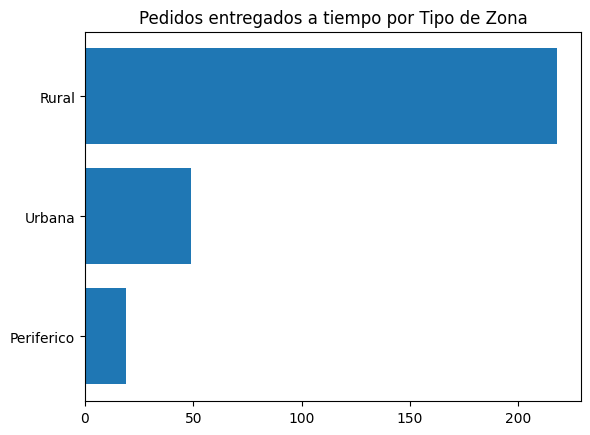

In [25]:
fig, ax = plt.subplots()
labels = zona_on_time["TIPO ZONA"]
datos = zona_on_time["count"]

ax.set_title("Pedidos entregados a tiempo por Tipo de Zona")
ax.barh(labels, datos)

In [26]:
zona_off_time = entregado_off_time["TIPO ZONA"].value_counts().to_frame().sort_values(by= "count", ascending = True).reset_index()
zona_off_time

,TIPO ZONA,count
0,Periferico,10
1,Rural,16
2,Urbana,20


<BarContainer object of 3 artists>

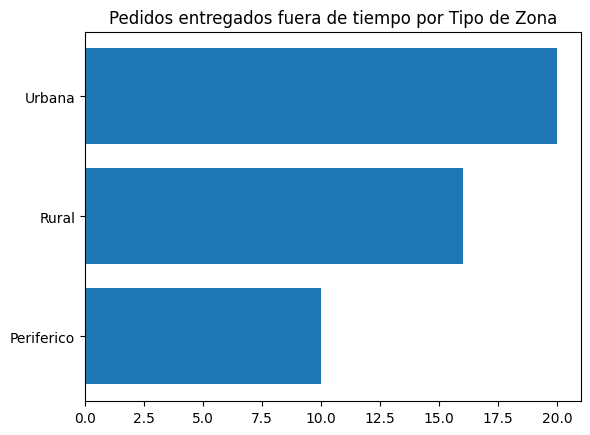

In [28]:
fig, ax = plt.subplots()
labels = zona_off_time["TIPO ZONA"]
datos = zona_off_time["count"]

ax.set_title("Pedidos entregados fuera de tiempo por Tipo de Zona")
ax.barh(labels, datos)

In [15]:
#Top 10 de provincias con mas pedidos entregados a tiempo
#Top 10 de departamentos con mas pedidos entregados a tiempo
#Top 10 de provincias con mas pedidos entregrado fuera de tiempo
#Top 10 de departamentos con mas pedidos entregrado fuera de tiempo